Ensemble Test Accuracy: 97.45%


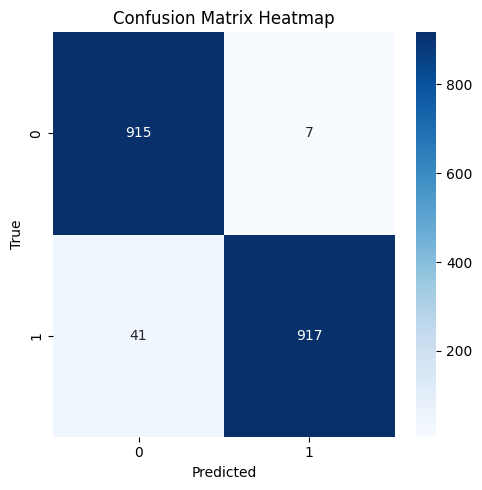

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar les prediccions de cada model des de la carpeta 'predictions'
predictions_model1 = np.load('predictions/predictions_logistic_reg.npy')
predictions_model2 = np.load('predictions/predictions_svm.npy')
predictions_model3 = np.load('predictions/predictions_tree.npy')
predictions_model4 = np.load('predictions/predictions_random_forest.npy')

# Carregar les etiquetes reals des de la carpeta 'predictions'
y_test = np.load('predictions/test.npy')

# Combinar les prediccions utilitzant votació majoritària
combined_predictions = np.round((predictions_model1 + predictions_model2 + predictions_model3 + predictions_model4) / 4)

# Avaluar la precisió del model combinat
ensemble_accuracy = accuracy_score(y_test, combined_predictions)
print(f"Ensemble Test Accuracy: {round(ensemble_accuracy * 100, 2)}%")

# Visualitzar la matriu de confusió
conf_matrix = confusion_matrix(y_test, combined_predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()